# **HUDM5199 Final Project**

### **Author:** Yutong Shen

## **Introduction/background**
According to the CDC, heart disease is one of the leading causes of death for people of most races in the US, including African Americans, American Indians, Alaska Natives, and white people. About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicators include diabetic status, obesity (high BMI), not getting enough physical activity, or drinking too much alcohol. Detecting and preventing the factors that have impact on heart disease is very important in healthcare. I will create predictions of which respondent had heart disease and use these predictions to detect and prevent heart disease.

## **Data/Data Preprocessing**

The dataset I’m using: Key Indicators of Heart Disease, comes from Kaggle (https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease). The dataset originally comes from the 2020 annual CDC survey of 400k adults related to their health status.

The vast majority of columns in the dataset are questions asked to respondents about their health status, such as "Do you have serious difficulty walking or climbing stairs?" or "Have you smoked at least 100 cigarettes in your entire life?" Kamil Pytlak (who is the owner of the dataset on Kaggle) noticed many different factors that directly or indirectly influence heart disease, so he decided to select the most relevant variables from it and do some cleaning so that it would be used for data science projects. 

The dataset I will be working on contains 319795 observations and 18 variables (9 booleans, 5 strings and 4 decimals), including:
* **HeartDisease**: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
* **BMI**: Body Mass Index (BMI)
* **Smoking**: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
* **AlcoholDrinking**: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
* **Stroke**: (Ever told) (you had) a stroke?
* **PhysicalHealth**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)
* **MentalHealth**: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)
* **DiffWalking**: Do you have serious difficulty walking or climbing stairs?
* **Sex**: Are you male or female?
* **AgeCategory**: Age category
* **Race**: Imputed race/ethnicity value
* **Diabetic**: (Ever told) (you had) diabetes?
* **PhysicalAcivity**: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
* **GenHealth**: Would you say that in general your health is...
* **SleepTime**: On average, how many hours of sleep do you get in a 24-hour period?
* **Asthma**: (Ever told) (you had) asthma?
* **KidneyDisease**: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
* **SkinCancer**: (Ever told) (you had) skin cancer?


As described above, the original dataset of nearly 300 variables was reduced to just about 20 variables. In addition to classical EDA, this dataset can be used to apply a range of machine learning methods, most notably classifier models. I will treat the variable "HeartDisease" as a binary ("Yes" - respondent had heart disease; "No" - respondent had no heart disease). And I will build models to predict whether a respondent had heart disease.

### Import Data

In [6]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# read the data
data = pd.read_csv("heart_2020_cleaned.csv")
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [8]:
data.shape

(319795, 18)

### Check for Missing Value

In [9]:
# check if there are any missing values
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### Map Categorical Variables

In [10]:
# map 'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'
y = {'No': 0, 'Yes': 1}
for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
  data[col+'_dummy'] = data[col].map(y)
  data = data.drop([col], axis=1)
data.head()

,BMI,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_dummy,Smoking_dummy,AlcoholDrinking_dummy,Stroke_dummy,DiffWalking_dummy,PhysicalActivity_dummy,Asthma_dummy,KidneyDisease_dummy,SkinCancer_dummy
0,16.60,3.0,30.0,Female,55-59,White,Yes,Very good,5.0,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,Female,80 or older,White,No,Very good,7.0,0,0,0,1,0,1,0,0,0
2,26.58,20.0,30.0,Male,65-69,White,Yes,Fair,8.0,0,1,0,0,0,1,1,0,0
3,24.21,0.0,0.0,Female,75-79,White,No,Good,6.0,0,0,0,0,0,0,0,0,1
4,23.71,28.0,0.0,Female,40-44,White,No,Very good,8.0,0,0,0,0,1,1,0,0,0


In [11]:
# check for unique values of 'Diabetic'
data['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [12]:
# map 'Diabetic'
g = {'No': -1, 'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1, 'Yes': 2}
data['Diabetic_dummy'] = data['Diabetic'].map(g)
data = data.drop(['Diabetic'], axis=1)
data.head()

,BMI,PhysicalHealth,MentalHealth,Sex,AgeCategory,Race,GenHealth,SleepTime,HeartDisease_dummy,Smoking_dummy,AlcoholDrinking_dummy,Stroke_dummy,DiffWalking_dummy,PhysicalActivity_dummy,Asthma_dummy,KidneyDisease_dummy,SkinCancer_dummy,Diabetic_dummy
0,16.60,3.0,30.0,Female,55-59,White,Very good,5.0,0,1,0,0,0,1,1,0,1,2
1,20.34,0.0,0.0,Female,80 or older,White,Very good,7.0,0,0,0,1,0,1,0,0,0,-1
2,26.58,20.0,30.0,Male,65-69,White,Fair,8.0,0,1,0,0,0,1,1,0,0,2
3,24.21,0.0,0.0,Female,75-79,White,Good,6.0,0,0,0,0,0,0,0,0,1,-1
4,23.71,28.0,0.0,Female,40-44,White,Very good,8.0,0,0,0,0,1,1,0,0,0,-1


In [13]:
# map 'Sex'
g = {'Female': 0, 'Male': 1}
data['Sex_dummy'] = data['Sex'].map(g)
data = data.drop(['Sex'], axis=1)
data.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,HeartDisease_dummy,Smoking_dummy,AlcoholDrinking_dummy,Stroke_dummy,DiffWalking_dummy,PhysicalActivity_dummy,Asthma_dummy,KidneyDisease_dummy,SkinCancer_dummy,Diabetic_dummy,Sex_dummy
0,16.60,3.0,30.0,55-59,White,Very good,5.0,0,1,0,0,0,1,1,0,1,2,0
1,20.34,0.0,0.0,80 or older,White,Very good,7.0,0,0,0,1,0,1,0,0,0,-1,0
2,26.58,20.0,30.0,65-69,White,Fair,8.0,0,1,0,0,0,1,1,0,0,2,1
3,24.21,0.0,0.0,75-79,White,Good,6.0,0,0,0,0,0,0,0,0,1,-1,0
4,23.71,28.0,0.0,40-44,White,Very good,8.0,0,0,0,0,1,1,0,0,0,-1,0


In [14]:
# check for unique values for AgeCategory
data['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [15]:
# map 'AgeCategory'
a = {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80 or older': 12}
data['Age_dummy'] = data['AgeCategory'].map(a)
data = data.drop(['AgeCategory'], axis=1)
data.head()

,BMI,PhysicalHealth,MentalHealth,Race,GenHealth,SleepTime,HeartDisease_dummy,Smoking_dummy,AlcoholDrinking_dummy,Stroke_dummy,DiffWalking_dummy,PhysicalActivity_dummy,Asthma_dummy,KidneyDisease_dummy,SkinCancer_dummy,Diabetic_dummy,Sex_dummy,Age_dummy
0,16.60,3.0,30.0,White,Very good,5.0,0,1,0,0,0,1,1,0,1,2,0,7
1,20.34,0.0,0.0,White,Very good,7.0,0,0,0,1,0,1,0,0,0,-1,0,12
2,26.58,20.0,30.0,White,Fair,8.0,0,1,0,0,0,1,1,0,0,2,1,9
3,24.21,0.0,0.0,White,Good,6.0,0,0,0,0,0,0,0,0,1,-1,0,11
4,23.71,28.0,0.0,White,Very good,8.0,0,0,0,0,1,1,0,0,0,-1,0,4


In [16]:
# check for unique values for Race
data['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [17]:
# create dummy variable for 'Race'
dummyRace = pd.get_dummies(data['Race'], prefix = 'Race') 
data = pd.concat([data, dummyRace], axis=1)
data = data.drop(['Race'], axis=1)
data.head()

,BMI,PhysicalHealth,MentalHealth,GenHealth,SleepTime,HeartDisease_dummy,Smoking_dummy,AlcoholDrinking_dummy,Stroke_dummy,DiffWalking_dummy,...,SkinCancer_dummy,Diabetic_dummy,Sex_dummy,Age_dummy,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,16.60,3.0,30.0,Very good,5.0,0,1,0,0,0,...,1,2,0,7,0,0,0,0,0,1
1,20.34,0.0,0.0,Very good,7.0,0,0,0,1,0,...,0,-1,0,12,0,0,0,0,0,1
2,26.58,20.0,30.0,Fair,8.0,0,1,0,0,0,...,0,2,1,9,0,0,0,0,0,1
3,24.21,0.0,0.0,Good,6.0,0,0,0,0,0,...,1,-1,0,11,0,0,0,0,0,1
4,23.71,28.0,0.0,Very good,8.0,0,0,0,0,1,...,0,-1,0,4,0,0,0,0,0,1


In [18]:
# check for unique values for GenHealth
data['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [19]:
# map 'GenHealth'
h = {'Poor': -1, 'Fair': 0, 'Good': 1, 'Very good': 2, 'Excellent': 3}
data['GenHealth_dummy'] = data['GenHealth'].map(h)
data = data.drop(['GenHealth'], axis=1)
data.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_dummy,Smoking_dummy,AlcoholDrinking_dummy,Stroke_dummy,DiffWalking_dummy,PhysicalActivity_dummy,...,Diabetic_dummy,Sex_dummy,Age_dummy,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_dummy
0,16.60,3.0,30.0,5.0,0,1,0,0,0,1,...,2,0,7,0,0,0,0,0,1,2
1,20.34,0.0,0.0,7.0,0,0,0,1,0,1,...,-1,0,12,0,0,0,0,0,1,2
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,2,1,9,0,0,0,0,0,1,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,-1,0,11,0,0,0,0,0,1,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,1,...,-1,0,4,0,0,0,0,0,1,2


### Balance the Classes

In [20]:
data['HeartDisease_dummy'].value_counts()

0    292422
1     27373
Name: HeartDisease_dummy, dtype: int64

Because there are only 27373 observations where the respondent had heart disease out of the total 319795 observations and 292422 respondents had no heart disease, the classes are not balanced. I decide to randomly select 27373 observations where the respondent had no heart disease and combine it with the 'had heart disease' cases to make the dataset balanced. The resulting dataset will have 54746 observations.

In [21]:
# display the number of cases where the respondent had heart disease
df1 = data[data['HeartDisease_dummy'] == 1]
df1.shape

(27373, 23)

In [22]:
# randomly select 27373 observations where the respondent did not have heart disease
df2 = data[data['HeartDisease_dummy'] == 0].sample(n=27373)
df2

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_dummy,Smoking_dummy,AlcoholDrinking_dummy,Stroke_dummy,DiffWalking_dummy,PhysicalActivity_dummy,...,Diabetic_dummy,Sex_dummy,Age_dummy,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_dummy
282463,29.41,0.0,30.0,7.0,0,0,0,0,0,1,...,-1,1,3,0,0,0,0,0,1,2
173338,32.11,14.0,7.0,7.0,0,0,0,0,0,1,...,-1,0,0,0,0,0,0,0,1,1
244643,26.63,0.0,0.0,7.0,0,1,0,0,0,1,...,-1,0,11,0,0,0,0,0,1,1
298541,26.79,0.0,3.0,4.0,0,1,0,0,0,1,...,-1,0,7,0,0,1,0,0,0,3
200875,28.48,0.0,0.0,8.0,0,1,0,0,0,1,...,-1,1,8,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119757,21.74,1.0,1.0,8.0,0,0,0,0,0,1,...,-1,0,4,0,0,0,0,1,0,1
132244,25.82,0.0,0.0,7.0,0,0,0,0,0,1,...,-1,1,2,0,0,0,0,0,1,2
276110,26.52,0.0,0.0,8.0,0,0,0,0,0,1,...,-1,0,0,0,0,0,0,0,1,2
164202,28.66,0.0,0.0,7.0,0,0,0,0,0,0,...,-1,1,4,0,0,0,0,0,1,3


In [23]:
# merge df1 and df2
df = pd.concat([df1, df2]).reset_index(drop=True)
df

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_dummy,Smoking_dummy,AlcoholDrinking_dummy,Stroke_dummy,DiffWalking_dummy,PhysicalActivity_dummy,...,Diabetic_dummy,Sex_dummy,Age_dummy,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_dummy
0,28.87,6.0,0.0,12.0,1,1,0,0,1,0,...,-1,0,11,0,0,1,0,0,0,0
1,34.30,30.0,0.0,15.0,1,1,0,0,1,0,...,2,1,8,0,0,0,0,0,1,-1
2,32.98,10.0,0.0,4.0,1,1,0,1,1,1,...,2,1,11,0,0,0,0,0,1,-1
3,25.06,0.0,0.0,7.0,1,0,0,0,1,0,...,2,0,12,0,0,0,0,0,1,1
4,30.23,6.0,2.0,8.0,1,1,0,0,1,1,...,2,0,11,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54741,21.74,1.0,1.0,8.0,0,0,0,0,0,1,...,-1,0,4,0,0,0,0,1,0,1
54742,25.82,0.0,0.0,7.0,0,0,0,0,0,1,...,-1,1,2,0,0,0,0,0,1,2
54743,26.52,0.0,0.0,8.0,0,0,0,0,0,1,...,-1,0,0,0,0,0,0,0,1,2
54744,28.66,0.0,0.0,7.0,0,0,0,0,0,0,...,-1,1,4,0,0,0,0,0,1,3


In [24]:
# check if there are any missing values
df.isnull().sum()

BMI                                    0
PhysicalHealth                         0
MentalHealth                           0
SleepTime                              0
HeartDisease_dummy                     0
Smoking_dummy                          0
AlcoholDrinking_dummy                  0
Stroke_dummy                           0
DiffWalking_dummy                      0
PhysicalActivity_dummy                 0
Asthma_dummy                           0
KidneyDisease_dummy                    0
SkinCancer_dummy                       0
Diabetic_dummy                         0
Sex_dummy                              0
Age_dummy                              0
Race_American Indian/Alaskan Native    0
Race_Asian                             0
Race_Black                             0
Race_Hispanic                          0
Race_Other                             0
Race_White                             0
GenHealth_dummy                        0
dtype: int64

## **Exploratory Analyses**

### Data Visualization

In [25]:
pd.set_option('precision', 2)

In [26]:
# descriptive statistics
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_dummy,Smoking_dummy,AlcoholDrinking_dummy,Stroke_dummy,DiffWalking_dummy,PhysicalActivity_dummy,...,Diabetic_dummy,Sex_dummy,Age_dummy,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_dummy
count,54746.00,54746.00,54746.00,54746.00,54746.0,54746.00,54746.00,54746.00,54746.00,54746.00,...,54746.00,54746.00,54746.00,54746.00,54746.00,54746.00,54746.00,54746.00,54746.00,54746.00
mean,28.82,5.39,4.26,7.11,0.5,0.49,0.06,0.09,0.24,0.71,...,-0.31,0.53,7.74,0.02,0.02,0.07,0.07,0.03,0.79,1.22
std,6.50,9.96,8.56,1.59,0.5,0.50,0.23,0.29,0.43,0.45,...,1.24,0.50,3.38,0.13,0.13,0.25,0.26,0.18,0.41,1.14
min,12.21,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,...,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00
25%,24.41,0.00,0.00,6.00,0.0,0.00,0.00,0.00,0.00,0.00,...,-1.00,0.00,6.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,27.76,0.00,0.00,7.00,0.5,0.00,0.00,0.00,0.00,1.00,...,-1.00,1.00,8.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
75%,32.00,5.00,3.00,8.00,1.0,1.00,0.00,0.00,0.00,1.00,...,-1.00,1.00,10.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00
max,94.66,30.00,30.00,24.00,1.0,1.00,1.00,1.00,1.00,1.00,...,2.00,1.00,12.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00


In [27]:
# show the average BMI, PhysicalHealth, MentalHealth, SleepTime by HeartDisease_dummy
columns_to_show = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
df.groupby(['HeartDisease_dummy'])[columns_to_show].mean()

,BMI,PhysicalHealth,MentalHealth,SleepTime
HeartDisease_dummy,,,,
0,28.24,2.97,3.89,7.08
1,29.40,7.81,4.64,7.14


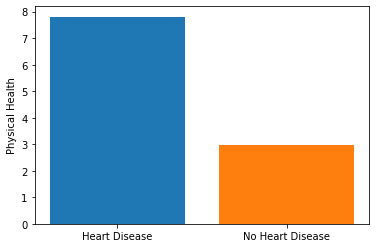

In [28]:
import matplotlib.pyplot as plt

# display the bar chart of the relationship between Heart Disease and Physical Health
fig, ax = plt.subplots()
ax.bar("Heart Disease", df1['PhysicalHealth'].mean())
ax.bar("No Heart Disease", df2['PhysicalHealth'].mean())
ax.set_ylabel("Physical Health")
plt.show()

For respondents who had heart disease, their physical health were not good (includes physical illness and injury) about 7.8 days during the past 30 days. While respondents who had no heart disease only reported about 3 days. So physical health may have an effect on the likelihood of heart disease.

In [29]:
# show the average 'Smoking_dummy', 'AlcoholDrinking_dummy', 'Stroke_dummy', 'DiffWalking_dummy', 'Diabetic_dummy', 'PhysicalActivity_dummy', 'Asthma_dummy', 'KidneyDisease_dummy', 'SkinCancer_dummy', 'Sex_dummy', 'Age_dummy', 'GenHealth_dummy' by HeartDisease_dummy
cols = ['Smoking_dummy', 'AlcoholDrinking_dummy', 'Stroke_dummy', 'DiffWalking_dummy', 'Diabetic_dummy', 'PhysicalActivity_dummy', 'Asthma_dummy', 
        'KidneyDisease_dummy', 'SkinCancer_dummy', 'Sex_dummy', 'Age_dummy', 'GenHealth_dummy']
df.groupby(['HeartDisease_dummy'])[cols].mean()

,Smoking_dummy,AlcoholDrinking_dummy,Stroke_dummy,DiffWalking_dummy,Diabetic_dummy,PhysicalActivity_dummy,Asthma_dummy,KidneyDisease_dummy,SkinCancer_dummy,Sex_dummy,Age_dummy,GenHealth_dummy
HeartDisease_dummy,,,,,,,,,,,,
0,0.40,0.07,0.03,0.12,-0.63,0.79,0.13,0.03,0.08,0.47,6.24,1.67
1,0.59,0.04,0.16,0.37,0.02,0.64,0.18,0.13,0.18,0.59,9.23,0.77


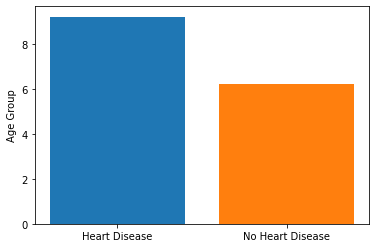

In [30]:
# display the bar chart of the relationship between Heart Disease and Age Category
fig, ax = plt.subplots()
ax.bar("Heart Disease", df1['Age_dummy'].mean())
ax.bar("No Heart Disease", df2['Age_dummy'].mean())
ax.set_ylabel("Age Group")
plt.show()

From the bar chart, we can see that the mean age group of respondents had heart disease is 65-69 (represented as 9), and the mean age group of respondents had no heart disease is 50-54 (represented as 6), indicating that age can have an effect on the likelihood of heart disease.

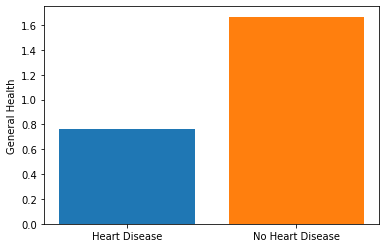

In [31]:
# display the bar chart of the relationship between Heart Disease and General Health
fig, ax = plt.subplots()
ax.bar("Heart Disease", df1['GenHealth_dummy'].mean())
ax.bar("No Heart Disease", df2['GenHealth_dummy'].mean())
ax.set_ylabel("General Health")
plt.show()

From the bar chart, we can see that the mean general health category for respondents had heart disease is between fair and good (0.77), while the mean general health category for respondents had no heart disease is between good and very good (1.67). So the general health of respondents may influence the likelihood of heart disease.

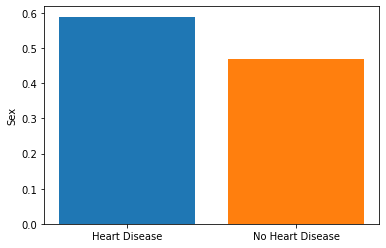

In [32]:
# display the bar chart of the relationship between Heart Disease and Sex
fig, ax = plt.subplots()
ax.bar("Heart Disease", df1['Sex_dummy'].mean())
ax.bar("No Heart Disease", df2['Sex_dummy'].mean())
ax.set_ylabel("Sex")
plt.show()

From the bar chart, we can see that slightly more male respondents than female respondents had heart disease.

### Correlation

In [33]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_dummy,Smoking_dummy,AlcoholDrinking_dummy,Stroke_dummy,DiffWalking_dummy,PhysicalActivity_dummy,...,Diabetic_dummy,Sex_dummy,Age_dummy,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_dummy
BMI,1.00,1.21e-01,0.07,-4.57e-02,8.94e-02,0.01,-3.42e-02,2.33e-02,0.21,-1.60e-01,...,2.36e-01,2.96e-02,-2.87e-02,1.90e-02,-6.60e-02,0.07,2.27e-02,2.12e-02,-5.43e-02,-2.09e-01
PhysicalHealth,0.12,1.00e+00,0.32,-7.09e-02,2.43e-01,0.13,-2.71e-02,1.73e-01,0.46,-2.74e-01,...,1.93e-01,-4.41e-02,1.19e-01,2.34e-02,-4.01e-02,0.01,-9.71e-03,2.45e-02,-5.86e-03,-5.54e-01
MentalHealth,0.07,3.18e-01,1.00,-1.25e-01,4.41e-02,0.09,4.79e-02,7.58e-02,0.19,-1.24e-01,...,4.93e-02,-1.11e-01,-1.51e-01,2.10e-02,-1.91e-02,0.02,2.83e-02,4.17e-02,-5.03e-02,-2.62e-01
SleepTime,-0.05,-7.09e-02,-0.12,1.00e+00,1.87e-02,-0.02,-6.50e-03,8.50e-03,-0.03,9.25e-03,...,9.98e-04,4.32e-03,1.23e-01,-1.07e-02,-1.88e-02,-0.02,-2.88e-02,-3.42e-02,5.76e-02,5.93e-02
HeartDisease_dummy,0.09,2.43e-01,0.04,1.87e-02,1.00e+00,0.19,-6.06e-02,2.33e-01,0.29,-1.67e-01,...,2.62e-01,1.21e-01,4.43e-01,1.17e-02,-6.25e-02,-0.02,-7.28e-02,-4.19e-03,7.83e-02,-3.95e-01
Smoking_dummy,0.01,1.32e-01,0.09,-2.11e-02,1.90e-01,1.00,8.39e-02,7.79e-02,0.14,-1.10e-01,...,7.97e-02,1.09e-01,1.34e-01,3.69e-02,-5.94e-02,-0.04,-7.98e-02,1.80e-02,7.32e-02,-2.03e-01
AlcoholDrinking_dummy,-0.03,-2.71e-02,0.05,-6.50e-03,-6.06e-02,0.08,1.00e+00,-2.34e-02,-0.04,1.63e-02,...,-7.47e-02,-2.42e-04,-8.49e-02,-5.04e-03,-1.43e-02,-0.02,-4.16e-03,5.91e-03,1.70e-02,4.44e-02
Stroke_dummy,0.02,1.73e-01,0.08,8.50e-03,2.33e-01,0.08,-2.34e-02,1.00e+00,0.21,-1.09e-01,...,1.32e-01,-1.52e-03,1.40e-01,2.84e-02,-1.45e-02,0.03,-1.89e-02,2.03e-02,-2.32e-02,-2.16e-01
DiffWalking_dummy,0.21,4.56e-01,0.19,-3.46e-02,2.91e-01,0.14,-4.28e-02,2.09e-01,1.00,-3.24e-01,...,2.48e-01,-7.96e-02,2.44e-01,3.37e-02,-4.54e-02,0.04,-1.60e-02,1.68e-02,-2.00e-02,-4.68e-01
PhysicalActivity_dummy,-0.16,-2.74e-01,-0.12,9.25e-03,-1.67e-01,-0.11,1.63e-02,-1.09e-01,-0.32,1.00e+00,...,-1.65e-01,6.48e-02,-1.38e-01,-2.65e-02,2.31e-02,-0.04,-2.61e-02,1.63e-03,4.25e-02,3.17e-01


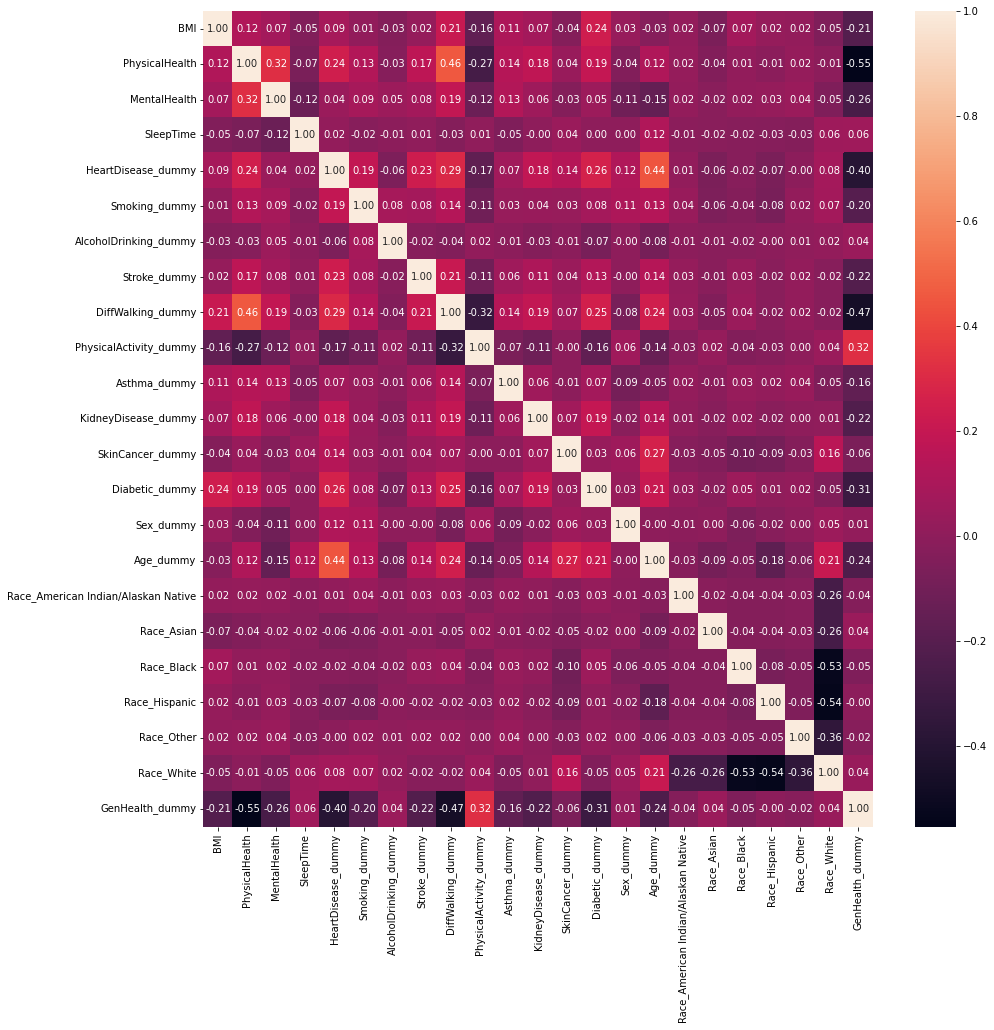

In [34]:
import seaborn as sns

fig = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

From the heatmap, we can see that **HeartDisease_dummy** is moderately correlated with **Age_dummy** (0.44) and **GenHealth_dummy** (-0.40). 

In addition, **HeartDisease_dummy** is weakly correlated with **PhysicalHealth** (0.24), **Stroke_dummy** (0.23), **DiffWalking_dummy** (0.29), and **Diabetic_dummy** (0.27).

## **Feature Selection**

Tree-based estimators can be used to compute impurity-based feature importances, which in turn can be used to discard irrelevant features.
I performed feature selection using Extra Trees Classifier since it was faster and easy for computation. Extra Trees Classifier would randomly sample the features at each split point of a decision tree.

In [61]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

X = df[['Smoking_dummy', 'AlcoholDrinking_dummy', 'Stroke_dummy', 'DiffWalking_dummy', 'Diabetic_dummy', 'PhysicalActivity_dummy', 'Asthma_dummy', 
        'KidneyDisease_dummy', 'SkinCancer_dummy', 'Sex_dummy', 'Age_dummy', 'GenHealth_dummy', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 
        'Race_Asian', 'Race_Black',	'Race_Hispanic', 'Race_Other', 'Race_White']]
y = np.ravel(df[['HeartDisease_dummy']])

model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, y)
print(model.feature_importances_)

[0.02260597 0.00890823 0.02936697 0.04357133 0.04937279 0.01881743
 0.01611335 0.01336741 0.01470673 0.02560706 0.18056633 0.08670482
 0.23551639 0.06909597 0.06209045 0.09545899 0.00248887 0.00578238
 0.00577005 0.00437634 0.00971213]


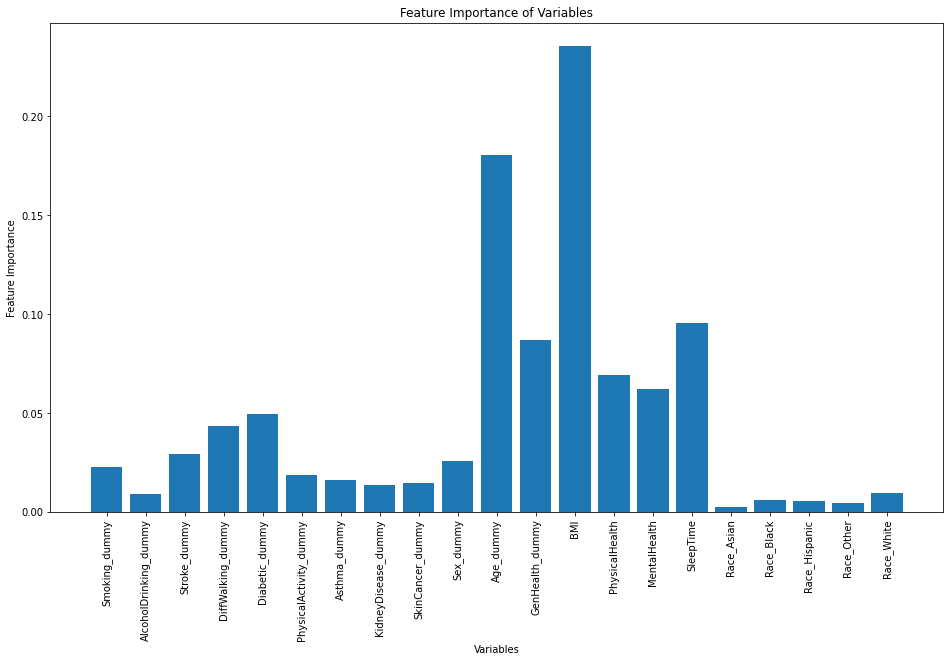

In [95]:
plt.figure(figsize=(16, 9))
plt.bar(x=['Smoking_dummy', 'AlcoholDrinking_dummy', 'Stroke_dummy', 'DiffWalking_dummy', 'Diabetic_dummy', 'PhysicalActivity_dummy', 'Asthma_dummy', 
        'KidneyDisease_dummy', 'SkinCancer_dummy', 'Sex_dummy', 'Age_dummy', 'GenHealth_dummy', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 
        'Race_Asian', 'Race_Black',	'Race_Hispanic', 'Race_Other', 'Race_White'], height=model.feature_importances_)
plt.xticks(rotation='vertical')
plt.xlabel('Variables')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of Variables')
plt.show()

The above computation gave us an importance score for each attribute where the larger the score, the more important the attribute. According to the importance scores, BMI, Age_dummy, SleepTime, GenHealth_dummy, PhysicalHealth, MentalHealth, Diabetic_dummy, DiffWalking_dummy, and Stroke_dummy as features were selected for inclusion in the models.

## **Methods & Results**

In [36]:
import numpy as np

In [81]:
X = df[['Age_dummy', 'BMI', 'SleepTime', 'GenHealth_dummy', 'PhysicalHealth', 'MentalHealth', 'Diabetic_dummy', 'DiffWalking_dummy', 'Stroke_dummy']]
y = np.ravel(df[['HeartDisease_dummy']])

In [82]:
from sklearn.model_selection import train_test_split

# Split data into training sets and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Implementing Logistic Regression**

In [83]:
from sklearn.linear_model import LogisticRegression

# Load LogisticRegression() and call for LogisticRegression.fit() 
LogitModel = LogisticRegression(max_iter=2000).fit(X_train, y_train)
y_pred = LogitModel.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix

# Compare the predicted Ys with what is actually in the testing dataset and obtain the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[6727 1576]
 [3325 4796]]


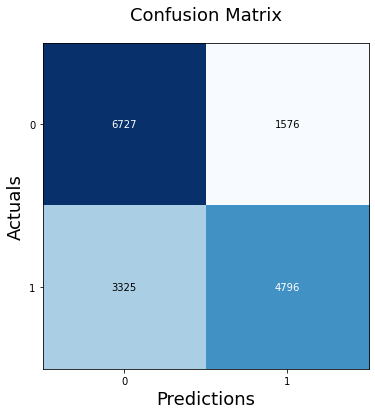

In [92]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [85]:
from sklearn.metrics import accuracy_score

# Obtaining accuracy scores
ac_logit = accuracy_score(y_test, y_pred)
print("The accuracy for logistic regression in sklearn is", ac_logit*100, "%")

The accuracy for logistic regression in sklearn is 75.4140282513395 %


In [86]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      8303
           1       0.74      0.77      0.76      8121

    accuracy                           0.75     16424
   macro avg       0.75      0.75      0.75     16424
weighted avg       0.75      0.75      0.75     16424



**Implementing Support Vector Machine**

In [87]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svcModel = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)
y_pred = svcModel.predict(X_test)

In [88]:
# Obtaining accuracy scores
ac_logit = accuracy_score(y_test, y_pred)
print("The accuracy for support vector classification in sklearn is", ac_logit*100, "%")

The accuracy for support vector classification in sklearn is 75.35923039454457 %


**Implementing Naive Bayes**

In [89]:
from sklearn.naive_bayes import GaussianNB

NBModel = GaussianNB(priors=[0.5, 0.5]).fit(X_train, y_train)
y_pred = NBModel.predict(X_test)

In [90]:
# Obtaining accuracy scores
ac_logit = accuracy_score(y_test, y_pred)
print("The accuracy for Naive Bayes in sklearn is", ac_logit*100, "%")

The accuracy for Naive Bayes in sklearn is 70.1595226497808 %


## **Discussion**

I implemented three models that I think are appropriate for the data: logistic regression, support vector machine, and Naive Bayes.

* Logistic Regression is the most common approach for classification and is easy to compute. It is a relatively conservative algorithm and is perfect for setting up a baseline to compare with.

* Support Vector Machine is another linear algorithm and is often used as a comparison with logistic regression. It goes a step further than logistic regression and estimates the boundary of each group.

* Naive Bayes is a non-linear classification algorithm that helps us learn from the features of a given label. It works well with categorical variables but faces the zero-probability problem when there is limited sample of the data to train the model. 

Based on the classification report, I got 75.41% accuracy using logistic regression, 75.36% accuracy using the support vector machine, and 70.16% accuracy using Naive Bayes. The model performance of the logistic regression was better than the other two in predicting which respondent had heart disease. However, the accuracies of logistic regression and support vector machine classification are quite similar. The low accuracy I got from Naive Bayes might be caused due to zero-probability problem. The labels might not be associated with relevant features and thus reduce the accuracy rate.

Potential limitations of the project include that the accuracies of the models are not very good, and I only attempted to build three models. In the future, I can try to implement more models and tune the hyperparameters to see if I can get higher accuracies.

## **References**

Pytlak, K. (2022, February 16). Personal key indicators of heart disease. Kaggle. Retrieved April 26, 2022, from https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease 